In [2]:
 !gdown https://drive.google.com/uc?id=1FxvmwTrYZsMyCMfH_mcrLJ2oStXABQG_

Downloading...
From: https://drive.google.com/uc?id=1FxvmwTrYZsMyCMfH_mcrLJ2oStXABQG_
To: /content/dataset.zip
100% 1.26G/1.26G [00:18<00:00, 69.8MB/s]


In [3]:
import zipfile

In [4]:
with zipfile.ZipFile("/content/dataset.zip",'r') as zip_ref:
    zip_ref.extractall("/content/sample_data")

In [5]:
import os
from tqdm import tqdm
import numpy as np
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
import os
import numpy as np
import cv2
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from collections import Counter
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [6]:
train_dir = '/content/sample_data/chest_xray/train'
test_dir = '/content/sample_data/chest_xray/test'

In [7]:
Normalimages = os.listdir(train_dir + "/NORMAL")
Pneumonaimages = os.listdir(train_dir + "/PNEUMONIA")

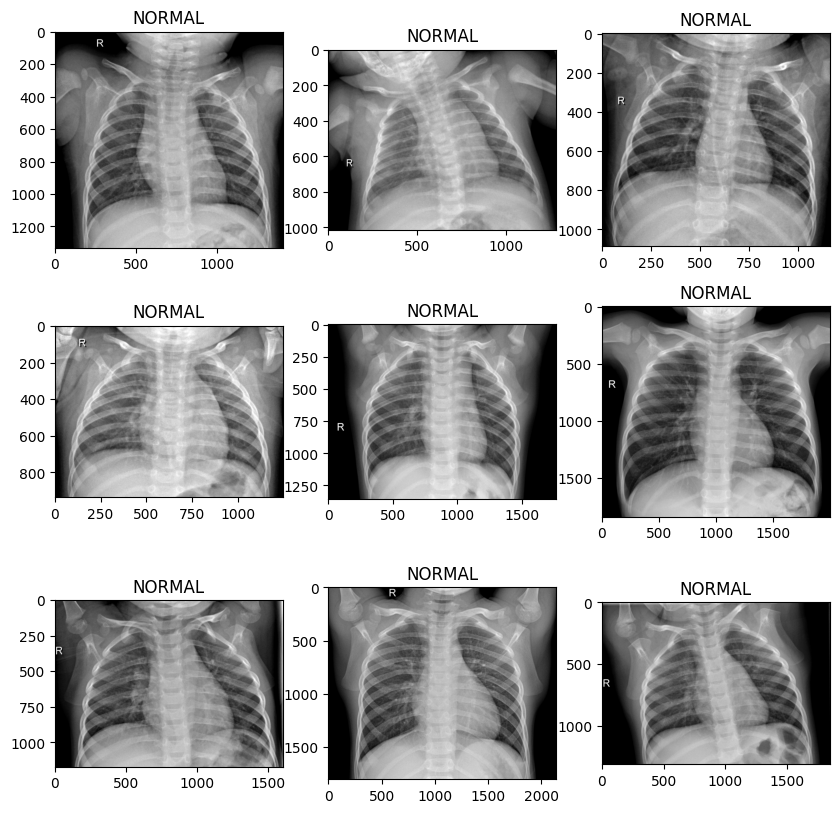

In [8]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_dir + "/NORMAL",Normalimages[i])),cmap='gray')
    plt.title("NORMAL")
plt.show()

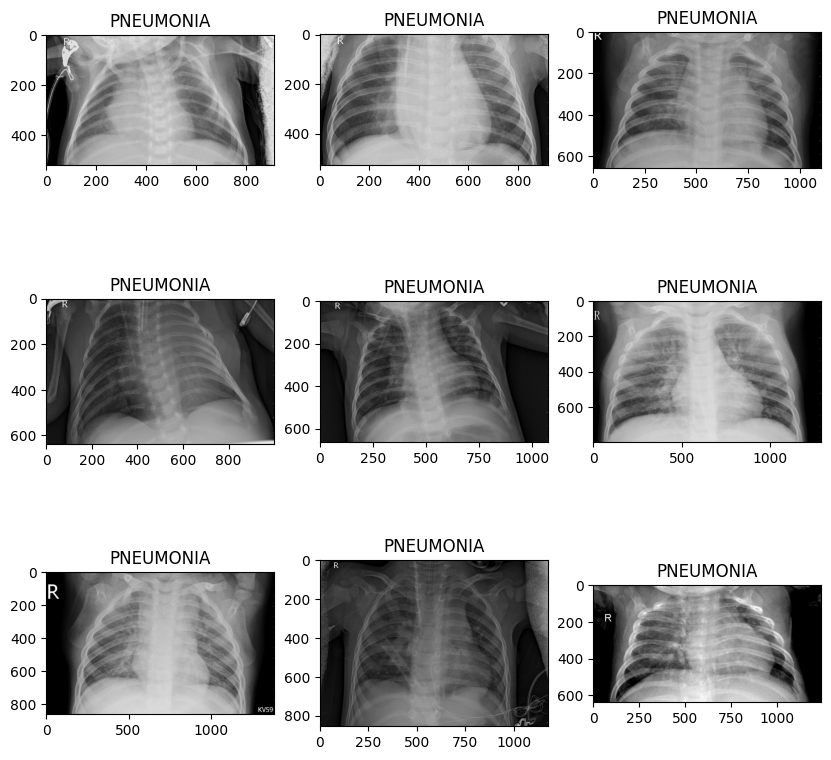

In [9]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_dir + "/PNEUMONIA",Pneumonaimages[i])),cmap='gray')
    plt.title("PNEUMONIA")
plt.show()

In [10]:
print("\nTrain set:")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("\nTest set:")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")



Train set:
PNEUMONIA=3883
NORMAL=1349

Test set:
PNEUMONIA=390
NORMAL=234


In [11]:
pneumonia_train = glob.glob(train_dir+"/PNEUMONIA/*.jpeg")
normal_train = glob.glob(train_dir+"/NORMAL/*.jpeg")

In [12]:
data = pd.DataFrame(np.concatenate([[0]*len(normal_train) , [1]*len(pneumonia_train)]),columns=["class"])

In [13]:
data.head()

,class
0,0
1,0
2,0
3,0
4,0


In [14]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [15]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=32,
                                       class_mode='binary',
                                       )


test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
                                      )

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
resnet_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    layer.trainable=False

x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)

predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


94668760/94668760 [==============================] - 3s 0us/step


In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)
history = model2.fit(train,epochs=8, validation_data=test, steps_per_epoch=100, callbacks=[early_stopping,lr], batch_size=8)

Epoch 1/8
100/100 [==============================] - 935s 9s/step - loss: 0.3010 - accuracy: 0.8737 - val_loss: 0.2308 - val_accuracy: 0.9263 - lr: 0.0010
Epoch 2/8
100/100 [==============================] - 916s 9s/step - loss: 0.1850 - accuracy: 0.9237 - val_loss: 0.1797 - val_accuracy: 0.9455 - lr: 0.0010
Epoch 3/8
100/100 [==============================] - 925s 9s/step - loss: 0.2119 - accuracy: 0.9159 - val_loss: 0.1721 - val_accuracy: 0.9359 - lr: 0.0010
Epoch 4/8
100/100 [==============================] - 910s 9s/step - loss: 0.2018 - accuracy: 0.9178 - val_loss: 0.3625 - val_accuracy: 0.8446 - lr: 0.0010
Epoch 5/8
100/100 [==============================] - 893s 9s/step - loss: 0.1762 - accuracy: 0.9271 - val_loss: 0.2143 - val_accuracy: 0.9199 - lr: 0.0010
Epoch 6/8
100/100 [==============================] - 903s 9s/step - loss: 0.1834 - accuracy: 0.9266 - val_loss: 0.2587 - val_accuracy: 0.8846 - lr: 0.0010
Epoch 7/8
100/100 [==============================] - 906s 9s/step - lo

In [22]:
score_Train = model2.evaluate(train)

print("Train Loss: ", score_Train[0])
print("Train Accuracy: ", score_Train[1])

score_Test = model2.evaluate(test)
print("Test loss: ", score_Test[0])
print("Test Accuracy: ", score_Test[1])

164/164 [==============================] - 1335s 8s/step - loss: 0.1886 - accuracy: 0.9228
Train Loss:  0.1886044591665268
Train Accuracy:  0.9227828979492188
312/312 [==============================] - 134s 431ms/step - loss: 0.1909 - accuracy: 0.9279
Test loss:  0.19092990458011627
Test Accuracy:  0.9278846383094788


In [20]:
model2.save('/content/sample_data/resnet50v2.h5')

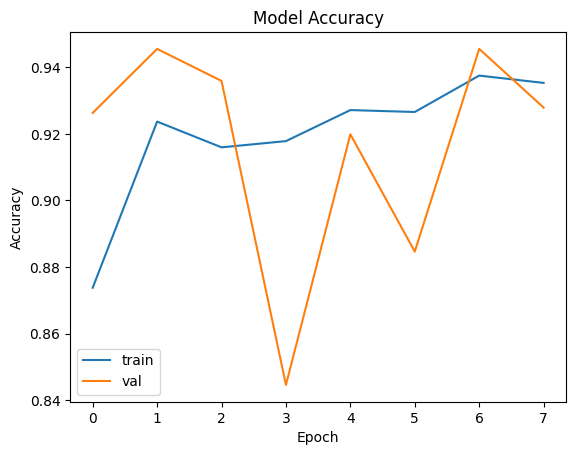

In [21]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()